In [31]:
import sys
import os
import matplotlib.pyplot as plt

import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import scripts.dicom as dicom

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "10_AP_Ax2.50mm"))
# path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "40_RTRD_Ax2.50mm"))

print(f"Loading DICOM files from {path}")
slices = dicom.load_dicom(path)

print(f"Number of slices: {len(slices)}")

Loading DICOM files from /Users/josep/Documents/master/11763-Medical-Image-Processing-Final-Project/data/1685/10_AP_Ax2.50mm
Number of slices: 86


In [34]:
print (f"First slice: {slices[0]}")

First slice: Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.111.3956.1410855854.4865
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: ''
(0008, 0013) Instance Creation Time              TM: '102414'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0017) Acquisition UID   

In [48]:
ds = slices[0]
print("PixelSpacing:", ds.get("PixelSpacing"))
print("SliceThickness:", ds.get("SliceThickness"))
print("SpacingBetweenSlices:", ds.get("SpacingBetweenSlices"))

PixelSpacing: [0.767578, 0.767578]
SliceThickness: 5.00
SpacingBetweenSlices: 2.5


In [35]:
for i in range(len(slices)):
    print(f"Slice {i}: {slices[i].InstanceNumber}")

Slice 0: 1
Slice 1: 2
Slice 2: 3
Slice 3: 4
Slice 4: 5
Slice 5: 6
Slice 6: 7
Slice 7: 8
Slice 8: 9
Slice 9: 10
Slice 10: 11
Slice 11: 12
Slice 12: 13
Slice 13: 14
Slice 14: 15
Slice 15: 16
Slice 16: 17
Slice 17: 18
Slice 18: 19
Slice 19: 20
Slice 20: 21
Slice 21: 22
Slice 22: 23
Slice 23: 24
Slice 24: 25
Slice 25: 26
Slice 26: 27
Slice 27: 28
Slice 28: 29
Slice 29: 30
Slice 30: 31
Slice 31: 32
Slice 32: 33
Slice 33: 34
Slice 34: 35
Slice 35: 36
Slice 36: 37
Slice 37: 38
Slice 38: 39
Slice 39: 40
Slice 40: 41
Slice 41: 42
Slice 42: 43
Slice 43: 44
Slice 44: 45
Slice 45: 46
Slice 46: 47
Slice 47: 48
Slice 48: 49
Slice 49: 50
Slice 50: 51
Slice 51: 52
Slice 52: 53
Slice 53: 54
Slice 54: 55
Slice 55: 56
Slice 56: 57
Slice 57: 58
Slice 58: 59
Slice 59: 60
Slice 60: 61
Slice 61: 62
Slice 62: 63
Slice 63: 64
Slice 64: 65
Slice 65: 66
Slice 66: 67
Slice 67: 68
Slice 68: 69
Slice 69: 70
Slice 70: 71
Slice 71: 72
Slice 72: 73
Slice 73: 74
Slice 74: 75
Slice 75: 76
Slice 76: 77
Slice 77: 78
Slice

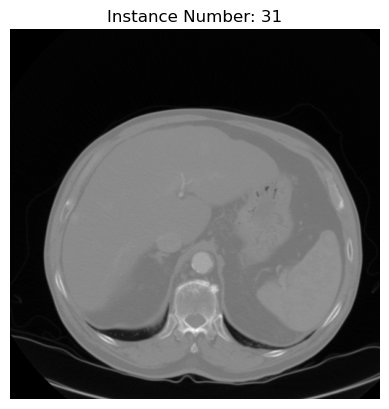

Slice 30 pixel array shape: (512, 512)


In [36]:
index = 30
plt.imshow(slices[index].pixel_array, cmap='gray')
plt.title(f"Instance Number: {slices[index].InstanceNumber}")
plt.axis('off')
plt.show()

print(f"Slice {index} pixel array shape: {slices[index].pixel_array.shape}")

# Transform it to 3d

In [58]:
# Convertir-les a un array 3D
img_dcm = dicom.create_3d_array_from_dicom(slices)
# img_dcm = np.flip(img_dcm, axis=0)  # Change orientation (better visualization)

print(f"3D image shape: {img_dcm.shape}")

3D image shape: (86, 512, 512)


In [59]:
# Obtain the pixel spacing, we will use the index 0, as all slices have the same spacing
pixel_spacing = slices[0].get("PixelSpacing")
print(f"Pixel spacing: {pixel_spacing}")

slice_spacing = slices[0].get("SpacingBetweenSlices")
print(f"Slice spacing: {slice_spacing}")


Pixel spacing: [0.767578, 0.767578]
Slice spacing: 2.5


### Median planes

Shape of the original image: (86, 512, 512)
Shape of the median sagittal plane: (86, 512)
Median Sagittal Plane shape: (86, 512)
Median Coronal Plane shape: (86, 512)


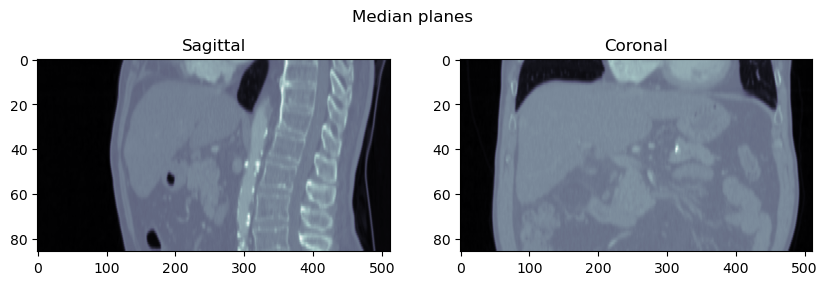

In [ ]:


# Obtenir el plane sagital i coronal
sagittal_plane = dicom.median_sagittal_plane(img_dcm)
coronal_plane = dicom.median_coronal_plane(img_dcm)

print(f"Median Sagittal Plane shape: {sagittal_plane.shape}")
print(f"Median Coronal Plane shape: {coronal_plane.shape}")

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].imshow(sagittal_plane, cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[0].set_title('Sagittal')
ax[1].imshow(coronal_plane, cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()


### Sagital

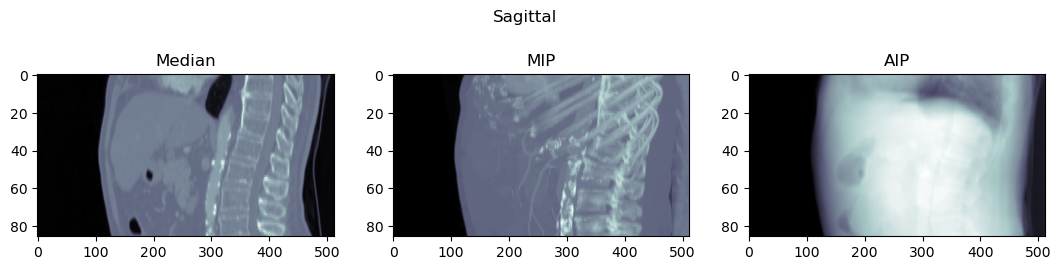

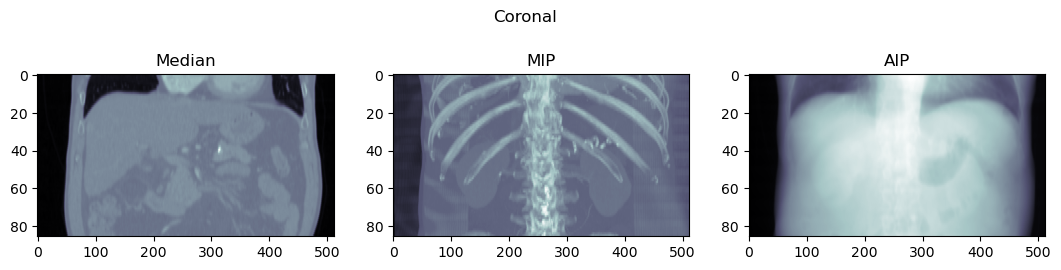

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(13, 3))
ax[0].imshow(dicom.median_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[0].set_title('Median')
ax[1].imshow(dicom.MIP_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[1].set_title('MIP')
ax[2].imshow(dicom.AIP_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(13, 3))
ax[0].imshow(dicom.median_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[0].set_title('Median')
ax[1].imshow(dicom.MIP_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[1].set_title('MIP')
ax[2].imshow(dicom.AIP_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()